# House Price Prediction

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.tight_layout()

from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

### Importing the dataset

In [2]:
data=pd.read_csv('house_price_prediction.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


### Basic Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
data.shape

(20640, 10)

In [5]:
data.size

206400

In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

### Summary Statistics for Categoric and Numeric Columns

In [8]:
numerical_columns = data.select_dtypes(include=np.number)
numerical_columns.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [9]:
categorical_columns = data.select_dtypes(exclude=np.number)
categorical_columns.columns

Index(['ocean_proximity'], dtype='object')

In [10]:
data[numerical_columns.columns.to_list()].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
data[categorical_columns.columns.to_list()].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


### Checking for null values

In [12]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Treating the null values

In [13]:
data['total_bedrooms'].isna().sum()

207

In [14]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
a=round(data.groupby(['ocean_proximity'])['total_bedrooms'].mean()[1],0)
a

534.0

In [16]:
data['total_bedrooms'].fillna(a,inplace=True)

In [17]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Removing the unwanted columns

In [18]:
data.drop(['latitude','longitude'],axis=1,inplace=True)
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


### Data Visualization

#### Univariate

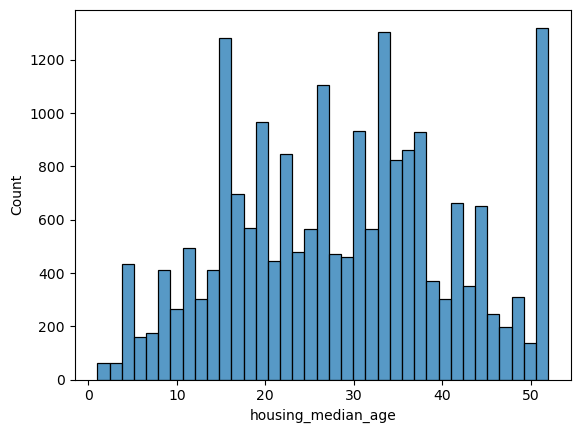

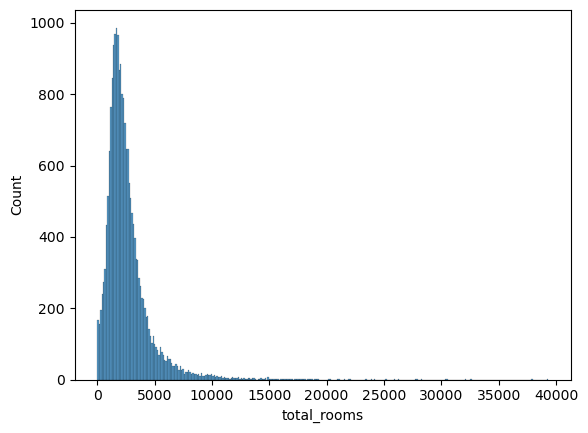

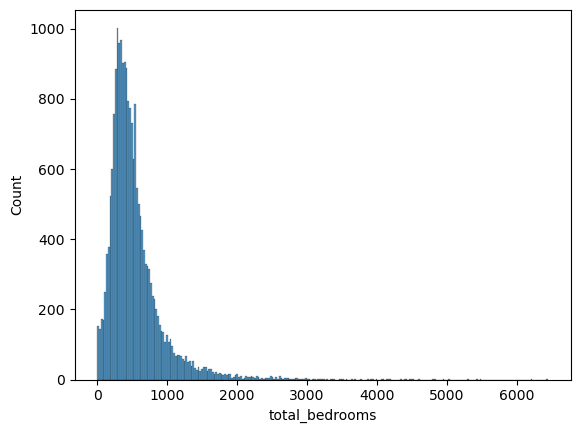

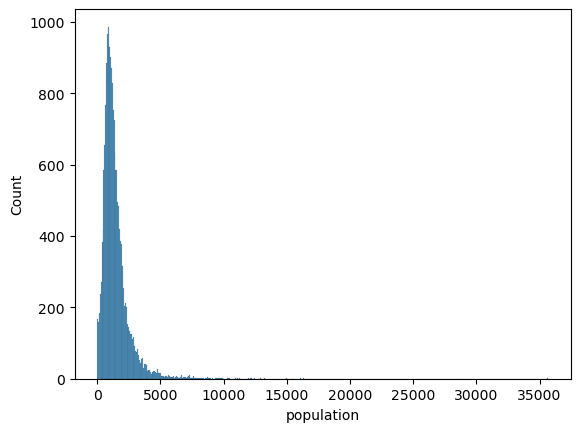

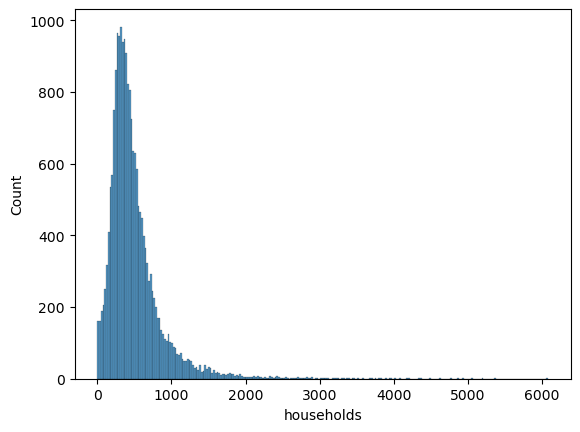

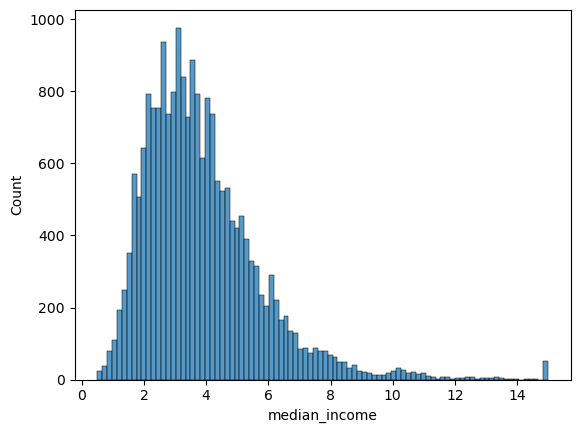

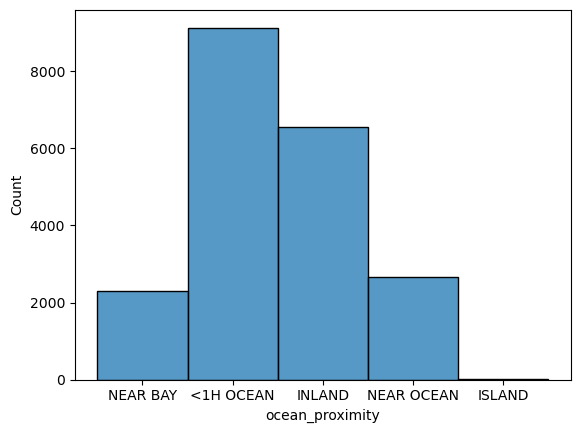

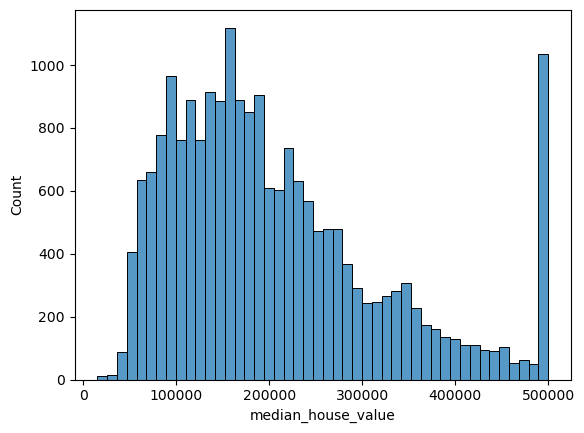

In [19]:
for i in data.columns.to_list():
    sns.histplot(data[i])
    plt.show()

In [20]:
numerical_columns = data.select_dtypes(include=np.number)
numerical_columns.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

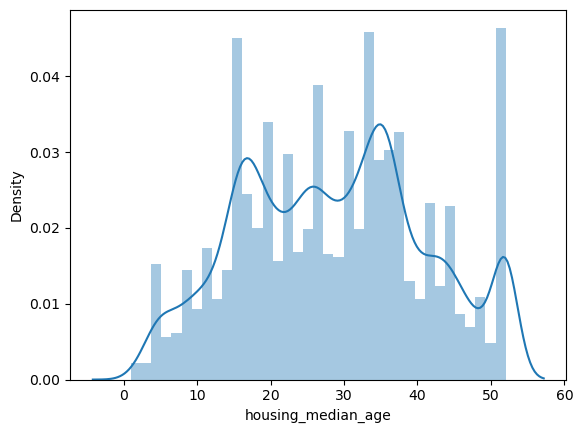

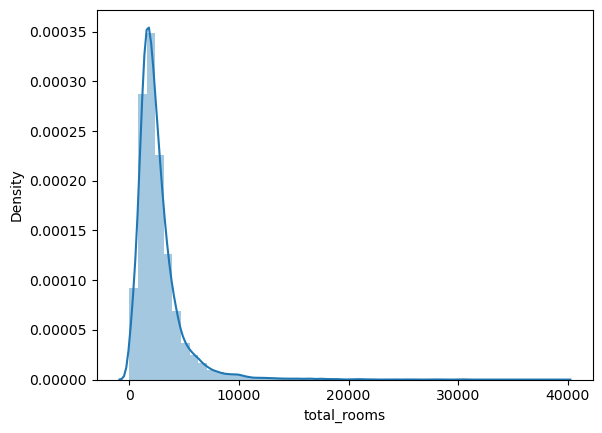

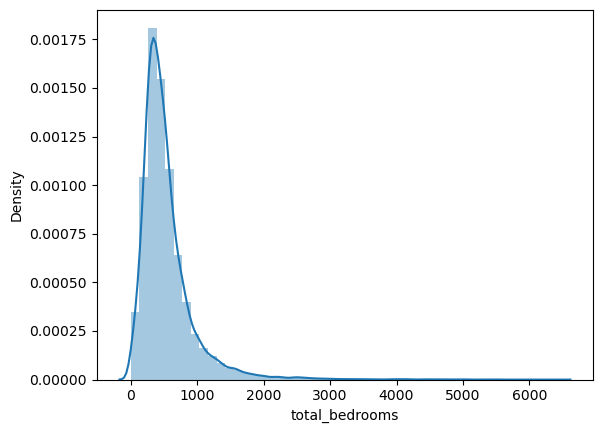

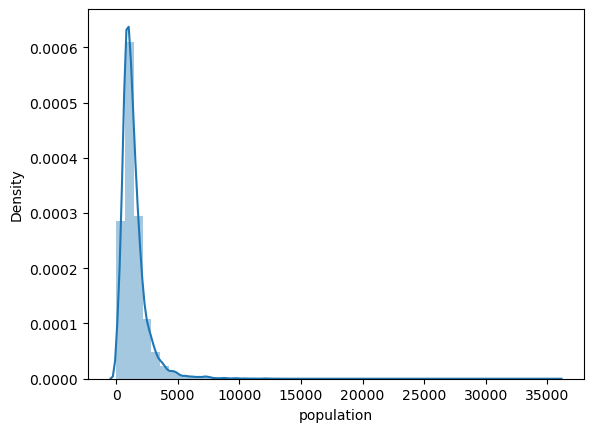

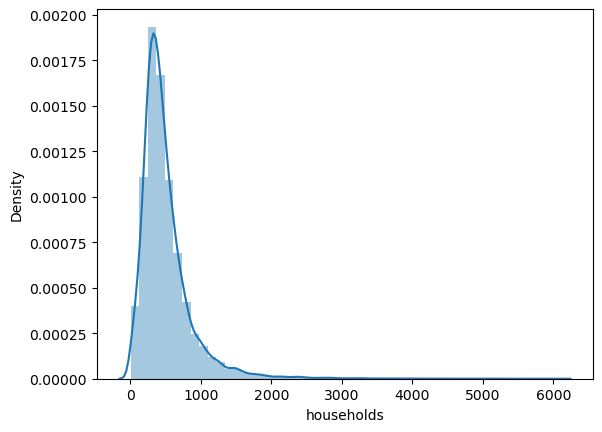

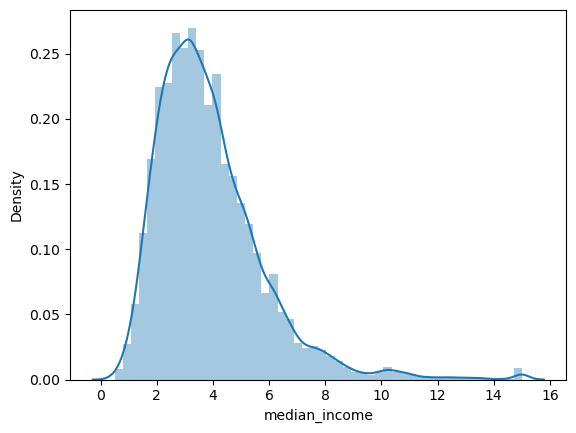

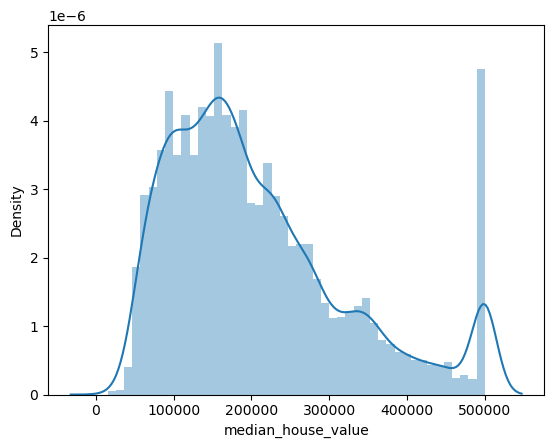

In [21]:
for i in numerical_columns.columns.to_list():
    sns.distplot(data[i])
    plt.show()

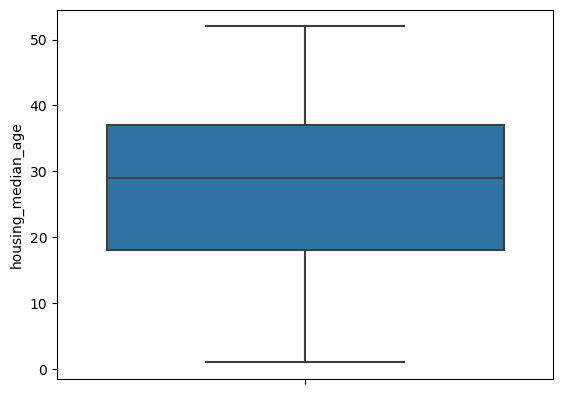

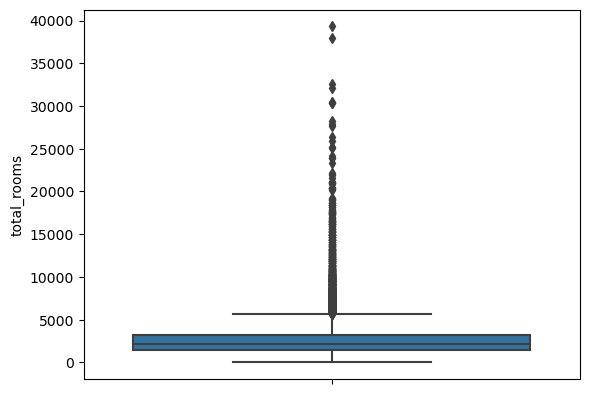

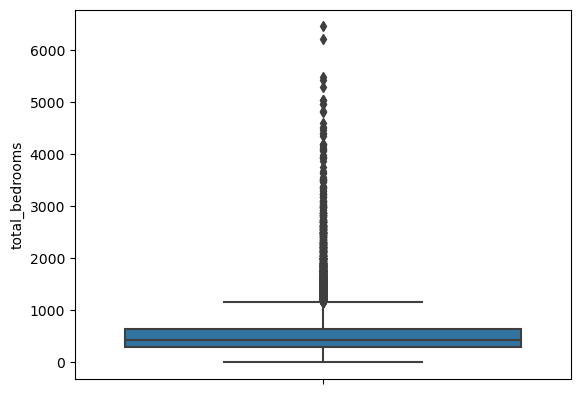

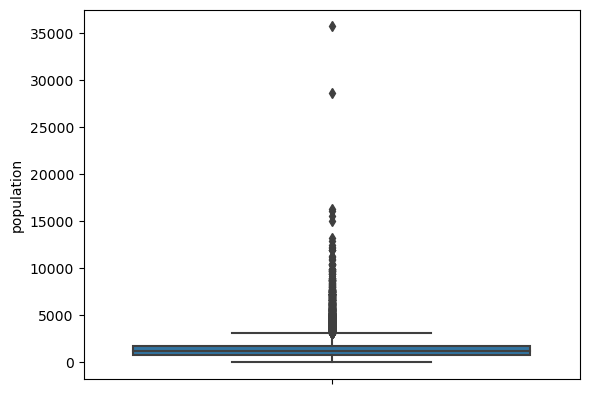

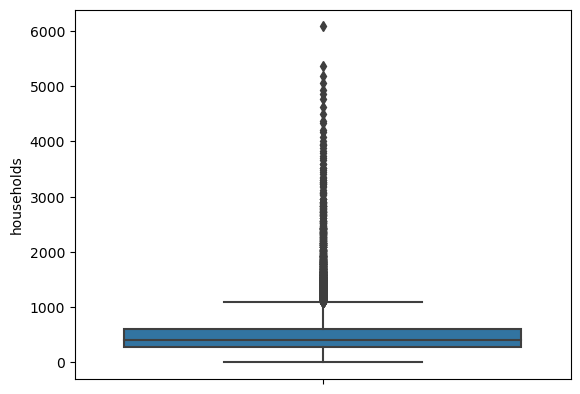

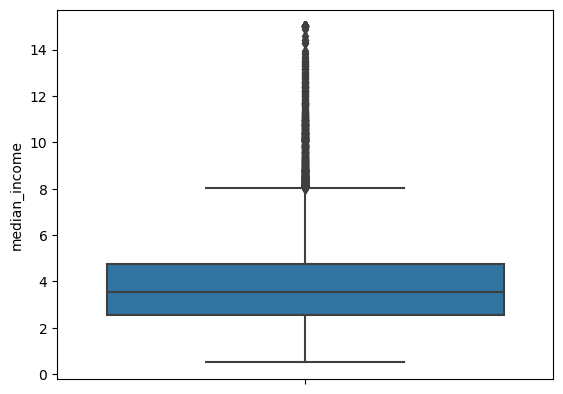

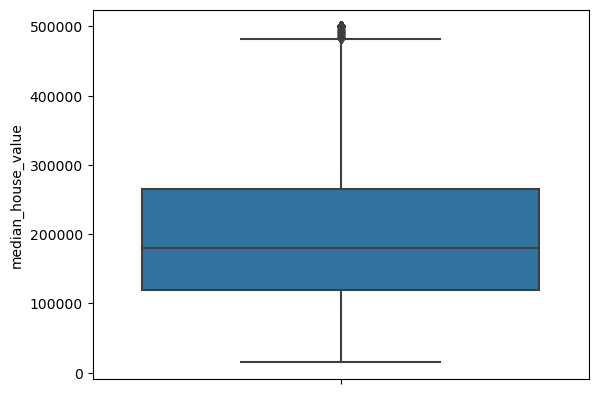

In [22]:
for i in numerical_columns.columns.to_list():
    sns.boxplot(y=data[i])
    plt.show()

In [23]:
data[categorical_columns.columns].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [24]:
data.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

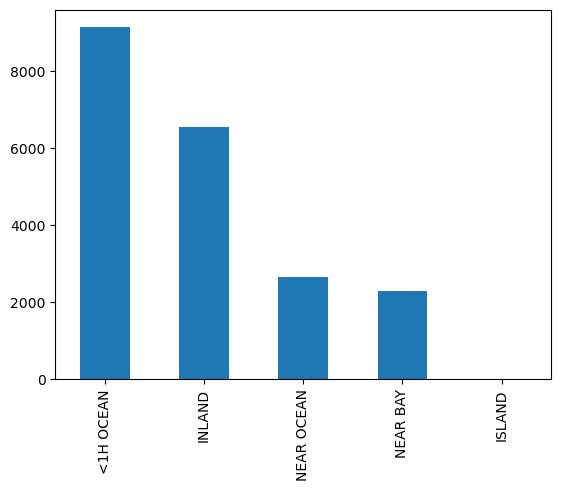

In [25]:
data['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

#### Bivariate

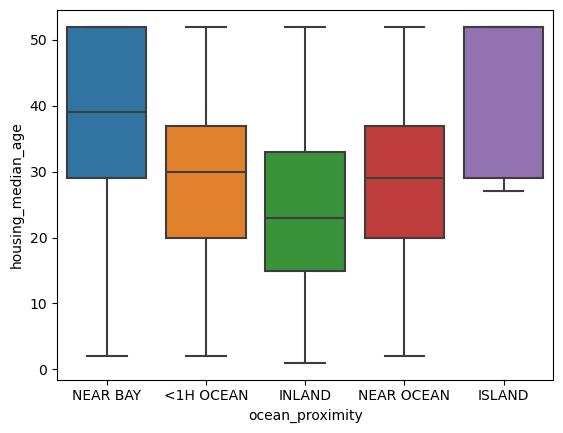

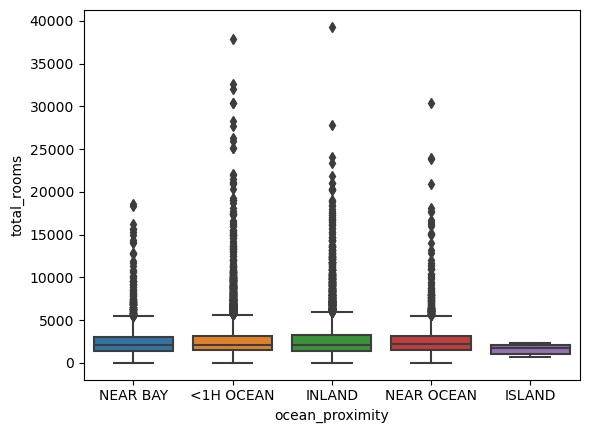

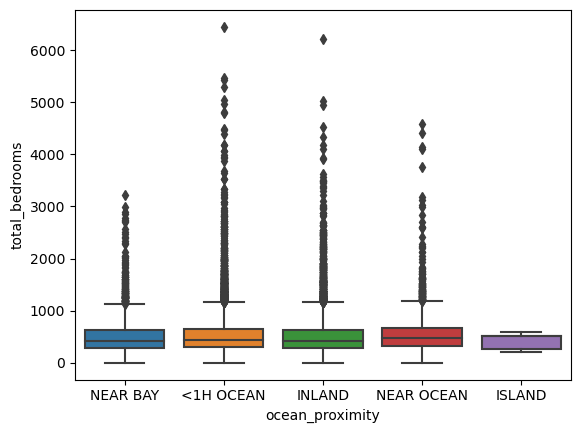

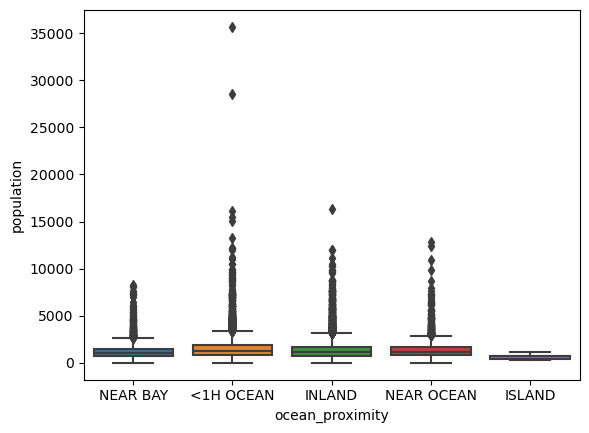

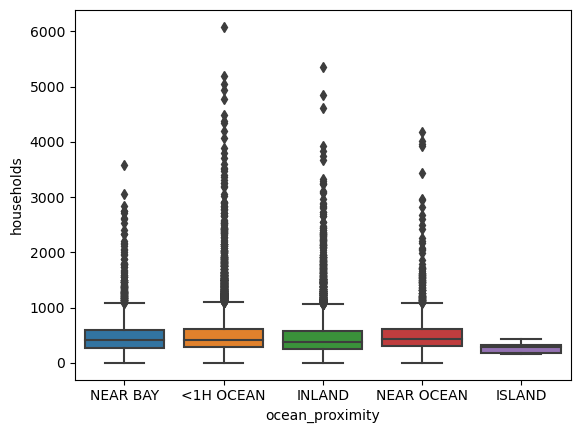

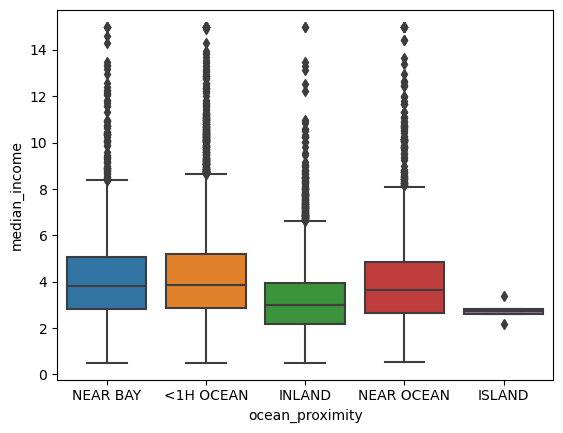

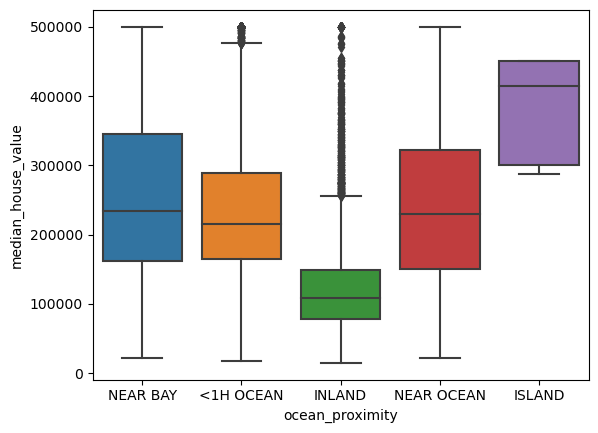

In [26]:
for i in numerical_columns.columns.to_list():
    sns.boxplot(y=data[i],x=data['ocean_proximity'])
    plt.show()

#### Multivariate

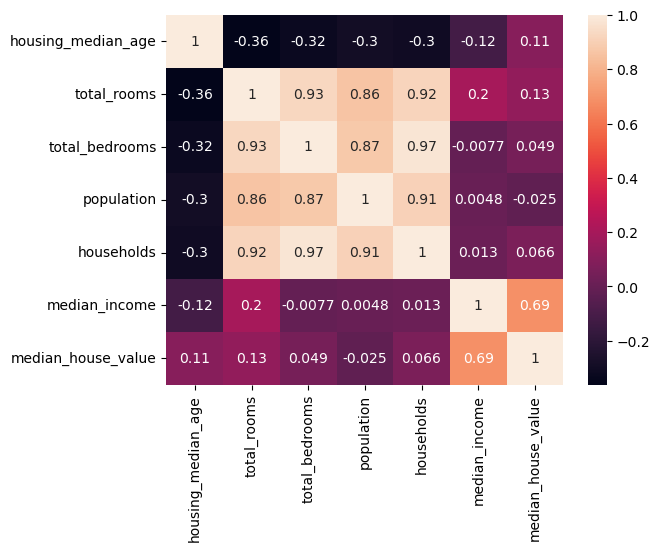

In [27]:
sns.heatmap(data[numerical_columns.columns].corr(),annot=True)
plt.show()

### Transformation

In [28]:
data.skew()

housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477297
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [29]:
data.kurt()

housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        22.239888
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64

In [30]:
trans = ['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [31]:
from sklearn.preprocessing import PowerTransformer
p = PowerTransformer(method='box-cox')
data[trans] = p.fit_transform(data[trans])
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,-1.157638,-1.577394,-1.618362,-1.517201,1.916290,NEAR BAY,452600
1,21,1.896642,1.442113,1.090062,1.634592,1.909694,NEAR BAY,358500
2,52,-0.534638,-1.136032,-1.139047,-1.134194,1.601978,NEAR BAY,352100
3,52,-0.713676,-0.876748,-0.999677,-0.877485,1.035967,NEAR BAY,341300
4,52,-0.399654,-0.653430,-0.984697,-0.665587,0.198026,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,-0.369126,-0.264463,-0.476623,-0.343792,-1.662622,INLAND,78100
20636,18,-1.419319,-1.410073,-1.511308,-1.624043,-0.662998,INLAND,77100
20637,17,0.046122,0.107205,-0.239693,0.040481,-1.492264,INLAND,92300
20638,18,-0.220497,-0.138994,-0.647731,-0.266681,-1.304363,INLAND,84700


In [32]:
data.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [33]:
data.skew()

housing_median_age    0.060331
total_rooms           0.123294
total_bedrooms        0.115064
population            0.113081
households            0.115953
median_income         0.004876
median_house_value    0.977763
dtype: float64

### Encoding

In [34]:
data=pd.get_dummies(data=data, columns=categorical_columns.columns)

In [35]:
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,-1.157638,-1.577394,-1.618362,-1.517201,1.916290,452600,0,0,0,1,0
1,21,1.896642,1.442113,1.090062,1.634592,1.909694,358500,0,0,0,1,0
2,52,-0.534638,-1.136032,-1.139047,-1.134194,1.601978,352100,0,0,0,1,0
3,52,-0.713676,-0.876748,-0.999677,-0.877485,1.035967,341300,0,0,0,1,0
4,52,-0.399654,-0.653430,-0.984697,-0.665587,0.198026,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,-0.369126,-0.264463,-0.476623,-0.343792,-1.662622,78100,0,1,0,0,0
20636,18,-1.419319,-1.410073,-1.511308,-1.624043,-0.662998,77100,0,1,0,0,0
20637,17,0.046122,0.107205,-0.239693,0.040481,-1.492264,92300,0,1,0,0,0
20638,18,-0.220497,-0.138994,-0.647731,-0.266681,-1.304363,84700,0,1,0,0,0


## Model Building

In [36]:
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14448, 11)
(14448,)
(6192, 11)
(6192,)


## Metrics

In [39]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [40]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))  

# Model using Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
m1=lr.fit(x_train,y_train)
pred=lr.predict(x_train)
met('Linear Regression model and result for train',y_train,pred)

Name of the model:  Linear Regression model and result for train
R-square of the model: 0.603532321585108
RMSE of the model: 72735.4286255345
MAE of the model: 54424.52914408319


In [42]:
lr.score(x_train,y_train)

0.603532321585108

In [43]:
pred=lr.predict(x_test)
met('Linear Regression model and result for test',y_test,pred)

Name of the model:  Linear Regression model and result for test
R-square of the model: 0.6230768187374554
RMSE of the model: 70655.36694522617
MAE of the model: 53604.710659577606


In [44]:
lr.score(x_test,y_test)

0.6230768187374554

# Model using Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=100)
m2=dt.fit(x_train,y_train)
pred=dt.predict(x_train)
met('Decision Tree model and result for train',y_train,pred)

Name of the model:  Decision Tree model and result for train
R-square of the model: 1.0
RMSE of the model: 0.0
MAE of the model: 0.0


In [46]:
dt.score(x_train,y_train)

1.0

In [47]:
pred=dt.predict(x_test)
met('Decision Tree model and result for test',y_test,pred)

Name of the model:  Decision Tree model and result for test
R-square of the model: 0.4595817094045149
RMSE of the model: 84602.6081835024
MAE of the model: 57824.38727390181


dt.score(x_test,y_test)

# Model using Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=100)
m3=rf.fit(x_train,y_train)
pred=rf.predict(x_train)
met('Random Forest model and result for train',y_train,pred)

Name of the model:  Random Forest model and result for train
R-square of the model: 0.9594119172084569
RMSE of the model: 23272.410960210065
MAE of the model: 16192.538101467331


In [50]:
rf.score(x_train,y_train)

0.9594119172084569

In [51]:
pred=rf.predict(x_test)
met('Random Forest model and result for test',y_test,pred)

Name of the model:  Random Forest model and result for test
R-square of the model: 0.7184721300268129
RMSE of the model: 61063.18170096882
MAE of the model: 43093.80377906977


In [52]:
rf.score(x_test,y_test)

0.7184721300268129

* Best Model -- Random Forest Regressor
* R-Square -- 0.7
    * That is 70 percent of target can be explained by independent variables